<a href="https://colab.research.google.com/github/mrunalmania/Agents/blob/main/Markov_Chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch

In [ ]:
!pip3 install gym

In [ ]:
### Let's crreate the study and sleep process Markov chain.

import torch

T = torch.tensor([[0.4, 0.6], [0.8, 0.2]])

print(T)

tensor([[0.4000, 0.6000],
        [0.8000, 0.2000]])


In [ ]:
# calculate the transition probability after k = 2, 5, 10, 15 and 20

T_2 = torch.matrix_power(T, 2)
T_5 = torch.matrix_power(T, 5)
T_10 = torch.matrix_power(T, 10)
T_15 = torch.matrix_power(T, 15)
T_20 = torch.matrix_power(T, 20)

print(T_2)
print(T_5)
print(T_10)
print(T_15)
print(T_20)

tensor([[0.6400, 0.3600],
        [0.4800, 0.5200]])
tensor([[0.5670, 0.4330],
        [0.5773, 0.4227]])
tensor([[0.5715, 0.4285],
        [0.5714, 0.4286]])
tensor([[0.5714, 0.4286],
        [0.5714, 0.4286]])
tensor([[0.5714, 0.4286],
        [0.5714, 0.4286]])


In [ ]:
# define the intial distribution of the state

v = torch.tensor([0.7, 0.3])


In [ ]:
# caculate the state distribution after k = 1, 2, 5,10,15 and 20.

v_1 = torch.matmul(v, T)
v_2 = torch.matmul(v, T_2)
v_5 = torch.matmul(v, T_5)
v_10 = torch.matmul(v, T_10)
v_15 = torch.matmul(v, T_15)
v_20 = torch.matmul(v, T_20)

print(v_1)
print(v_2)
print(v_5)
print(v_10)
print(v_15)
print(v_20)

tensor([0.5200, 0.4800])
tensor([0.5920, 0.4080])
tensor([0.5701, 0.4299])
tensor([0.5714, 0.4286])
tensor([0.5714, 0.4286])
tensor([0.5714, 0.4286])


In [ ]:
import torch

T = torch.tensor([[[0.8, 0.1, 0.1],
                   [0.1, 0.6, 0.3]],
                  [[0.7, 0.2, 0.1],
                   [0.1, 0.8, 0.1]],
                  [[0.6, 0.2, 0.2],
                   [0.1, 0.4, 0.5]]])


In [ ]:
print(T)

tensor([[[0.8000, 0.1000, 0.1000],
         [0.1000, 0.6000, 0.3000]],

        [[0.7000, 0.2000, 0.1000],
         [0.1000, 0.8000, 0.1000]],

        [[0.6000, 0.2000, 0.2000],
         [0.1000, 0.4000, 0.5000]]])


In [ ]:
R = torch.tensor([1., 0. , -1.])
gamma = 0.5

In [ ]:
action = 0

In [ ]:
def cal_val_matrix_inversion(rewards, trans_matrix, gamma):
  inv = torch.inverse(torch.eye(rewards.shape[0]) - gamma * trans_matrix)
  return torch.matmul(inv, rewards.reshape(-1, 1))


In [ ]:
trans_matrix = T[:, action]
V = cal_val_matrix_inversion(R, trans_matrix, gamma)


In [ ]:
print(V)

tensor([[ 1.6787],
        [ 0.6260],
        [-0.4820]])


In [ ]:
print(trans_matrix)

tensor([[0.8000, 0.1000, 0.1000],
        [0.7000, 0.2000, 0.1000],
        [0.6000, 0.2000, 0.2000]])


In [ ]:
# let's make discount factor zero.

gamma = 0.

V = cal_val_matrix_inversion(R, T[:, action], gamma)
print(V)

tensor([[ 1.],
        [ 0.],
        [-1.]])


In [ ]:
gamma = 0.99
V = cal_val_matrix_inversion(R, T[:, action], gamma)
print(V)

tensor([[65.8293],
        [64.7194],
        [63.4876]])


## Policy Evaluation

In [ ]:
import torch

T  = torch.tensor([[[0.8, 0.1, 0.1],
                    [0.1, 0.6, 0.3]],
                   [[0.7, 0.2, 0.1],
                    [0.1, 0.8, 0.1]],
                   [[0.6, 0.2, 0.2],
                    [0.1, 0.4, 0.5]]])

print(T)

tensor([[[0.8000, 0.1000, 0.1000],
         [0.1000, 0.6000, 0.3000]],

        [[0.7000, 0.2000, 0.1000],
         [0.1000, 0.8000, 0.1000]],

        [[0.6000, 0.2000, 0.2000],
         [0.1000, 0.4000, 0.5000]]])


In [ ]:
R = torch.tensor([1., 0., -1.])
gamma = 0.5

In [ ]:
# here in policy evaluation we need to define the threshold to determine when to stop.

threshold = 0.0001

In [ ]:
# let's define the policy where action a0 (studying) choosen in all circumstances.

policy_optimal = torch.tensor([[1.0, 0.0], [1.0, 0.0], [1.0, 0.0]])

In [ ]:
def policy_evaluation(policy, rewards, trans_matrix, gamma, threshold):
  n_state = policy.shape[0]
  V = torch.zeros(n_state)

  while True:
    V_temp = torch.zeros(n_state)
    for state , actions in enumerate(policy):
      for action, action_prob in enumerate(actions):
        V_temp[state] += action_prob * (R[state] + gamma * torch.dot(T[state, action] , V))

    max_delta = torch.max(torch.abs(V - V_temp))

    if max_delta < threshold:
      break

    V = V_temp

  return V


In [ ]:
# let's check with optimal policy

V = policy_evaluation(policy_optimal, R, T, gamma, threshold)
print(V)

tensor([ 1.6785,  0.6259, -0.4822])


In [ ]:
policy_random = torch.tensor([[0.5, 0.5], [0.5, 0.5], [0.5, 0.5]])
V_1 = policy_evaluation(policy_random, R, T, gamma, threshold)
print(V_1)

tensor([ 1.2347,  0.2691, -0.9014])


In [ ]:
# let's keep track of the history.

def policy_evaluation(policy, rewards, trans_matrix, gamma, threshod):
  n_state = policy.shape[0]
  V = torch.zeros(n_state)
  V_his = [V]

  while True:
    V_temp = torch.zeros(n_state)

    for state, actions in enumerate(policy):
      for action, action_prob in enumerate(actions):
        V_temp[state] += action_prob * (rewards[state] + gamma * torch.dot(trans_matrix[state, action], V))
    max_delta = torch.max(torch.abs(V - V_temp))
    V = V_temp.clone()
    V_his.append(V)

    if max_delta < threshold:
      break
  return V, V_his

In [ ]:
gamma = 0.5

In [ ]:
V, V_history = policy_evaluation(policy_optimal, R, T, gamma, threshold)
print(f" V: {V} \n")
print(f" V_history: {V_history}")

 V: tensor([ 1.6786,  0.6260, -0.4821]) 

 V_history: [tensor([0., 0., 0.]), tensor([ 1.,  0., -1.]), tensor([ 1.3500,  0.3000, -0.8000]), tensor([ 1.5150,  0.4625, -0.6450]), tensor([ 1.5969,  0.5443, -0.5638]), tensor([ 1.6378,  0.5851, -0.5229]), tensor([ 1.6582,  0.6056, -0.5024]), tensor([ 1.6684,  0.6158, -0.4922]), tensor([ 1.6736,  0.6209, -0.4871]), tensor([ 1.6761,  0.6235, -0.4846]), tensor([ 1.6774,  0.6248, -0.4833]), tensor([ 1.6780,  0.6254, -0.4826]), tensor([ 1.6784,  0.6257, -0.4823]), tensor([ 1.6785,  0.6259, -0.4822]), tensor([ 1.6786,  0.6260, -0.4821])]


<ipython-input-19-7cca5924240c>:11: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([s0, s1, s2], ["State 0", 'State 1', 'State 2'])


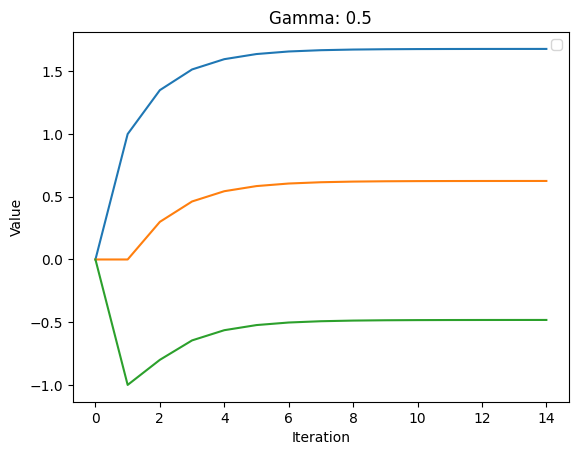

In [ ]:
# let's plot the graph for V-history.

import matplotlib.pyplot as plt

s0 = plt.plot([v[0] for v in V_history])
s1 = plt.plot([v[1] for v in V_history])
s2 = plt.plot([v[2] for v in V_history])

plt.title(f"Gamma: {gamma}")

plt.legend([s0, s1, s2], ["State 0", 'State 1', 'State 2'])
plt.xlabel("Iteration")
plt.ylabel("Value")

plt.show()



## Frozen Lake simulations

In [ ]:
import gym
import torch

env = gym.make('FrozenLake-v1', map_name="4x4", new_step_api=True)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
n_state = env.observation_space.n

In [ ]:
print(n_state)

16


In [ ]:
# action
n_action = env.action_space.n

In [ ]:
print(n_action)

4


In [ ]:
env.reset()

0

In [ ]:

env.render()

/usr/local/lib/python3.11/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_reso

In [ ]:
new_state, reward, done, info = env.step(1)
env.render(mode='human')

/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


ValueError: too many values to unpack (expected 4)

In [ ]:
print(new_state)
print(reward)
print(done)
print(info)

0
0.0
False
{'prob': 0.3333333333333333}


In [ ]:
# let's demonstrate how difficult it is to walk on a frozon lake.
def run_episode(env, policy):
  state = env.reset()
  total_reward = 0

  is_done = False
  while not is_done:
    action = policy[state].item()
    new_state, reward, is_done, info = env.step(action)
    total_reward += reward
    state = new_state
    if is_done:
      break
  return total_reward

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
test = torch.randint(high=2, size=(100,))
print(test)

tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0])


In [ ]:
n_episodes = 1000
total_rewards = []

for i in range(n_episodes):
  policy = torch.randint(high=n_action, size=(n_state,))
  total_reward = run_episode(env,policy)
  total_rewards.append(total_reward)

avg_reward = sum(total_rewards) / n_episodes
print(f"Average reward: {avg_reward}")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Average reward: 0.011


In [ ]:
# let's search for the best policy
while True:
  policy = torch.randint(high=n_action, size=(n_state,))
  total_reward = run_episode(env, policy)
  if total_reward == 1:
    best_policy = policy
    break

In [ ]:
print(best_policy)

tensor([1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2])


In [ ]:
# now let's run the 1000 episodes with best policy.
total_rewards = []
for i in range(1000):
  total_reward = run_episode(env, best_policy)
  total_rewards.append(total_reward)

avg_reward = sum(total_rewards) / 1000
print(avg_reward)


0.056
